In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Bifurcation analysis
First calculating fixed points for the system

In [28]:
lambda_vals = [i/1000 for i in range(1,500)]

def eq_1_solver(lambda_value):
    f = sp.symbols('f')
    equation = sp.Eq(lambda_value * f, (1 + 4*f) / (6*f**2 - 7*f + 1))
    solutions = sp.solve(equation, f)
    real_solutions = [sp.re(sol) for sol in solutions]
    return real_solutions[0], real_solutions[1]

def eq_2_solver(lambda_value):
    f = sp.symbols('f')
    equation = sp.Eq(lambda_value * f, (1 - 4*f) / (6*f**2 + 7*f + 1))
    solutions = sp.solve(equation, f)
    real_solutions = [sp.re(sol) for sol in solutions]
    return real_solutions[0]

In [29]:
stable_bif = []
saddle_bif = []
spiral_bif = []

for i in lambda_vals:
    stable_bif.append(eq_1_solver(i)[0])
    saddle_bif.append(eq_1_solver(i)[1])
    spiral_bif.append(eq_2_solver(i))

# Plotting the bifurcation diagram

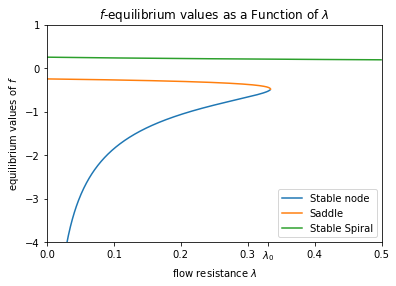

In [57]:
plt.plot(lambda_vals[0:333], stable_bif[0:333], label='Stable node')
plt.plot(lambda_vals[0:334], saddle_bif[0:334], label='Saddle')
plt.plot(lambda_vals, spiral_bif, label='Stable Spiral')

plt.xlabel('flow resistance $\lambda$')
plt.ylabel(r'equilibrium values of $f$')
plt.title(r'$f$-equilibrium values as a Function of $\lambda$')
plt.ylim(-4, 1)
plt.xlim(0, 0.5)
plt.xticks([0, 0.1, 0.2, 0.3, 0.33, 0.4, 0.5], [0.0, 0.1, 0.2, 0.3, r'$\lambda_0$', 0.4, 0.5])
plt.legend()
desktop_path = '/Users/karlfindhansen/Desktop/bifurcation_diagram.png'  # skriv hvor du vil gemme det her, ligger det også ind i mappen
plt.savefig(desktop_path, dpi=300)
plt.show()
